# Project:  (Tmdb-Movies Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Overview: 
> This project is talking about TMDB movies analysis, so I made some adjustment on data to answer the following question.
### Questions:

>**1. What is the movies that have the highest and Lowest budget?**
>
>**2. What is the movies that have the highest and Lowest revenue?**
>
>**3. what is the year you want information on it?**
>
>**4. what is the most fequent generes?**
>
>**5. what is the most fequent cast?**
>
>**6. what is the most fequent director?**
>
>**7. what is count of generes in all years?**

## Importing Needed Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
> After loading the file we need to clean and drop unwanted data to make the analyze


### General Properties

In [6]:
#loading the csv file to read the dataset
df = pd.read_csv('tmdb-movies.csv')
#Get the first five rows from dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **From the cell above, I read the first five rows of dataset to know the content and how to analyze it.**

In [7]:
# Showing the columns in the dataset
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

> **From the cell above, I know now all the columns of the dataset**

In [8]:
# Show the shape of the dataset how many rows and columns 
df.shape

(10866, 21)

> **From the cell above, The shape of Dataset is (10866 rows and 21 columns)**

### Data Cleaning (Remove and drop unwanted data)
>**1. Drop unwanted cloumns that is useless of my questions.**
>
>**2. Check if there is null and zero cells and drop them from the dataset.**
>
>**3. Check if there is duplicated rows and drop them from the dataset.**
>
>**4. Make adjustment on data types if needed.**

In [9]:
# Columns that i want to drop from the dataset
del_col=['id','imdb_id','popularity','homepage','keywords', 'overview','production_companies', 'vote_count', 'vote_average','budget_adj','revenue_adj']
# drop columns from the dataset
df.drop(del_col,axis=1,inplace=True)
# Check the dataset after the drop 
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


> **From the cell above, The Dataset after remove unwanted columns**

In [10]:
# check the shape of the dataset after drop
df.shape

(10866, 10)

> **From the cell above, The shape of Dataset is (10866 rows and 10 columns)**

In [11]:
# Check null in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   budget          10866 non-null  int64 
 1   revenue         10866 non-null  int64 
 2   original_title  10866 non-null  object
 3   cast            10790 non-null  object
 4   director        10822 non-null  object
 5   tagline         8042 non-null   object
 6   runtime         10866 non-null  int64 
 7   genres          10843 non-null  object
 8   release_date    10866 non-null  object
 9   release_year    10866 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 849.0+ KB


> **From the cell above, I noticed that there is an empty cells**

In [12]:
# Replace Zero values from budget and revenue with null 
list1 = ['budget','revenue']
for x in list1:
    df[x].replace(0,np.NaN,inplace=True)

> **From the cell above, We already know that there is rows in budget and revenue have the value zero.**

In [13]:
# Check null in dataset
df[df.budget.isnull()]

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
30,NaN,29355203.0,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,The man behind the myth,103,Mystery|Drama,6/19/15,2015
36,NaN,22354572.0,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,"A serial killer who can see your future, a psy...",101,Crime|Drama|Mystery,9/3/15,2015
72,NaN,45895.0,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,NaN,95,Thriller,4/17/15,2015
74,NaN,NaN,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,NaN,108,Action|Adventure|Fantasy,6/24/15,2015
75,NaN,NaN,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,105,Comedy|Drama,6/12/15,2015
...,...,...,...,...,...,...,...,...,...,...
10860,NaN,NaN,Carry On Screaming!,Kenneth Williams|Jim Dale|Harry H. Corbett|Joa...,Gerald Thomas,Carry On Screaming with the Hilarious CARRY ON...,87,Comedy,5/20/66,1966
10861,NaN,NaN,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,NaN,95,Documentary,6/15/66,1966
10862,NaN,NaN,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,176,Action|Adventure|Drama,12/21/66,1966
10863,NaN,NaN,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,NaN,94,Mystery|Comedy,1/1/66,1966


> **From the cell above, we replaced zero values in column (budget and revenue) to null to easy used.**

In [14]:
# Drop null values
df.dropna(subset=['budget'],axis=0,inplace=True)
df.dropna(subset=['revenue'],axis=0,inplace=True)

> **From the cell above, we droped null values from budget and revenue columns.**

In [15]:
#check duplicated data
df[df.duplicated()]

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
2090,30000000.0,967000.0,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Survival is no game,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,2010


> **From the cell above, I noticed that there is a duplicated row.**

In [16]:
# drop duplicated
df.drop_duplicates(inplace=True)

> **From the cell above, I droped duplicated .**

In [17]:
#last check on null values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          3854 non-null   float64
 1   revenue         3854 non-null   float64
 2   original_title  3854 non-null   object 
 3   cast            3850 non-null   object 
 4   director        3853 non-null   object 
 5   tagline         3574 non-null   object 
 6   runtime         3854 non-null   int64  
 7   genres          3854 non-null   object 
 8   release_date    3854 non-null   object 
 9   release_year    3854 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 331.2+ KB


> **We notice that there is a null values in director column but it isn't necessary to my quesition.**

In [18]:
# Check the shape of data after drop nulls from dataset  
df.shape

(3854, 10)

In [19]:
# Check if there is zero values in runtim column.
df[df.runtime==0]

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year


> **Now, the data is cleaned, Let's check the types**

In [20]:
#Check the types of columns.
df.dtypes

budget            float64
revenue           float64
original_title     object
cast               object
director           object
tagline            object
runtime             int64
genres             object
release_date       object
release_year        int64
dtype: object

> **we noticed that release date is object so to analyze i should change it to datetime**

In [21]:
#adjust the type
df['release_date'] = pd.to_datetime(df['release_date'])

> **We are now ready to analyze our data**

<a id='eda'></a>
## Exploratory Data Analysis

In [19]:
# Show the statistics of the dataset
df.describe()

,budget,revenue,runtime,release_year
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000
mean,3.720370e+07,1.076866e+08,109.220291,2001.261028
std,4.220822e+07,1.765393e+08,19.922820,11.282575
min,1.000000e+00,2.000000e+00,15.000000,1960.000000
25%,1.000000e+07,1.360003e+07,95.000000,1995.000000
50%,2.400000e+07,4.480000e+07,106.000000,2004.000000
75%,5.000000e+07,1.242125e+08,119.000000,2010.000000
max,4.250000e+08,2.781506e+09,338.000000,2015.000000


> **Here we see the the average budget is around 37,203,700 dollar and the average revenue is around 107,686,600 dollar and the average runtime is around 109 minute.**

> **From the cell above, we see the statistics of the dataset**

In [20]:
#define function
def analyze(column):
    #for lowest earned
    high_value=df[column].idxmax()
    high_value_datafram=pd.DataFrame(df.loc[high_value])
    
    #for lowest earned 
    low_value= df[column].idxmin()
    low_value_datafram=pd.DataFrame(df.loc[low_value])
    
    #merge data
    info=pd.concat([high_value_datafram, low_value_datafram], axis=1)
    
    return info

> **From the cell above, we make a function that will answer the following questions:**

## Research Question 1 (What is the movies that have the highest and Lowest budget? )

In [21]:
analyze('budget')

,2244,2618
budget,425000000.0,1.0
revenue,11087569.0,100.0
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100,95
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
release_year,2010,1999


> **From the cell above, we noticed that the highest budget is the warrior's way movie and the Lowest budget is Lost & Found movie.**

## Research Question 2 (What is the movies that have the highest and Lowest revenue? )

In [22]:
analyze('revenue')

,1386,5067
budget,237000000.0,6000000.0
revenue,2781505847.0,2.0
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
tagline,Enter the World of Pandora.,NaN
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
release_year,2009,2003


> **From the cell above, we noticed that the highest revenue is Avatar movie and the Lowest revenue is Shattered Glass movie.**

## Research Question 3 (which year you want information on it? )

> **Now we will see the dataset of any year we select it**

In [25]:
def date():
    x=int(input('Enter date you want to review: '))
    z=pd.DataFrame(df[df.release_year==x])
    count = 0
    print(z[count:count+5])
    count+=5
    while True:
        y = input('do you want do see the next 5 rows of the data "yes or no": ').lower()
        if y =='yes':
            print(z[count:count+5])
            count+=5
        elif y=='no':
            print('Thanks')
            break

In [26]:
date()

Enter date you want to review: 2015
        budget       revenue                original_title  \
0  150000000.0  1.513529e+09                Jurassic World   
1  150000000.0  3.784364e+08            Mad Max: Fury Road   
2  110000000.0  2.952382e+08                     Insurgent   
3  200000000.0  2.068178e+09  Star Wars: The Force Awakens   
4  190000000.0  1.506249e+09                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

                         tagline  runtime  \
0              The park is open.      124   
1             What a Lovely Day.      120   
2     One C

> **the most frequent rows in selected columns:**

In [27]:
def freq(column):
    #take a column from the dataset, and separate the string by '|'
    freq = df[column].str.cat(sep = '|')
    #assign it to pandas series and storing the values separately
    freq = pd.Series(freq.split('|'))
    #arranging in descending order
    count = freq.value_counts(ascending = False)
    return count

### Research Question 4 (what is the most frequent genre? )

In [28]:
freq('genres')

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

## Research Question 5 (what is the most frequent cast? )

In [29]:
freq('cast')

Robert De Niro       52
Bruce Willis         46
Samuel L. Jackson    44
Nicolas Cage         43
Matt Damon           36
                     ..
Aaron Burns           1
Shawn Ashmore         1
Brian Howe            1
Polly Adams           1
Zitto Kazann          1
Length: 6839, dtype: int64

## Research Question 6 (what is the most frequent director? )

In [30]:
freq('director')

Steven Spielberg     28
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Steven Soderbergh    17
                     ..
Ryan Gosling          1
Tom McLoughlin        1
Tom Gormican          1
Tommy O'Haver         1
Neal Israel           1
Length: 1785, dtype: int64

## Visualizations

In [24]:
# Let's take movies from year: 2000 to 2015 and make our analysis
recent_df=df[df.release_year>2000]
recent_df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


In [25]:
def freq(column):
    #take a column from the dataset, and separate the string by '|'
    freq = recent_df[column].str.cat(sep = '|')
    #assign it to pandas series and storing the values separately
    freq = pd.Series(freq.split('|'))
    #arranging in descending order
    count = freq.value_counts(ascending = False)
    return count
freq('cast')

Nicolas Cage         28
Matt Damon           27
Colin Farrell        27
Robert De Niro       26
Samuel L. Jackson    26
                     ..
Percy Daggs III       1
Peter Minygululu      1
Andy Griffith         1
Joseph Ruskin         1
Ana de Armas          1
Length: 4488, dtype: int64

>**Note all the follwing numbers is approximatly from the graphs and according to the data we have.**

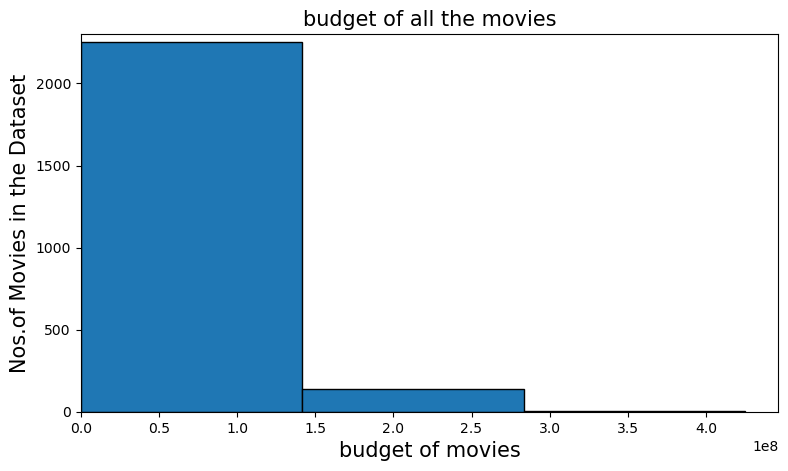

In [32]:
# Now Lets show budget of movies
plt.figure(figsize=(9,5), dpi = 100)
#x-axis 
plt.xlabel('budget of movies', fontsize = 15)
#y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('budget of all the movies', fontsize=15)
# using matplot to plot
plt.hist(recent_df.budget,bins=3,ec='black')
plt.xlim(0,)
plt.ylim(0,2300)
#diplaying the plot
plt.show()

> **From the above graph we noticed that more than 2000 movie has a budget from 10,000,000 dollar to around 140,000,000 dollar and less than 200 movie has a higher budget from 145,000,000 dollar to 280,000,000 dollar and around 5 movies has the highest budget from 281,000,000 dollar to 425,000,000 dollar.** 

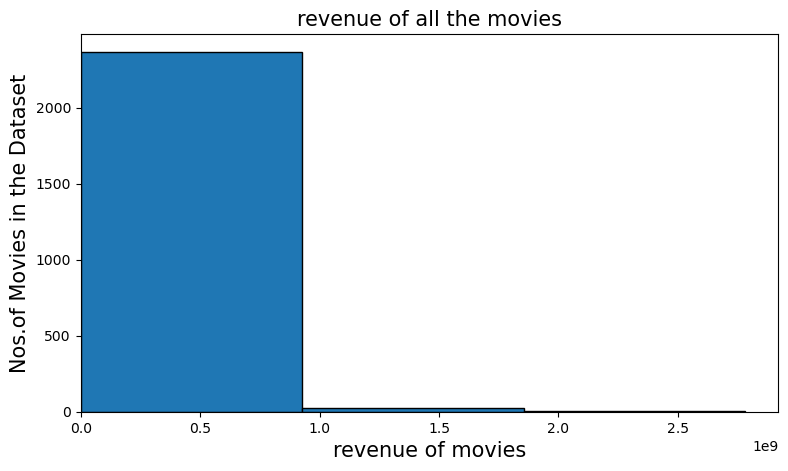

In [33]:
# lets see the revenue of movies
plt.figure(figsize=(9,5), dpi = 100)
#x-axis 
plt.xlabel('revenue of movies', fontsize = 15)
#y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('revenue of all the movies', fontsize=15)
# using matplot to plot
plt.hist(recent_df.revenue,bins=3,ec='black')
plt.xlim(0,)
plt.ylim(0,)
#diplaying the plot
plt.show()

> **From the above graph we noticed that more than 2000 movie has a revenue from 100,000,000 dollar to around 800,000,000 dollar and less than 400 movie has a higher revenue from 801,000,000 dollar to 1,750,000,000 dollar and around 5 movies has the highest revenue.** 

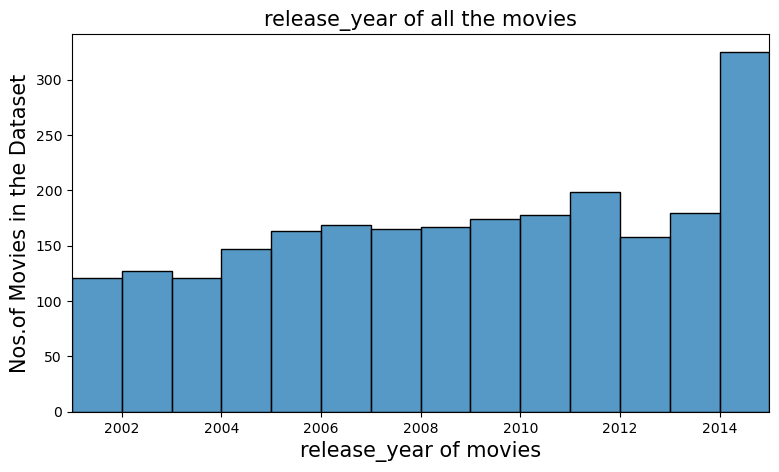

In [34]:
# Showing which yea have the highest number of movies
plt.figure(figsize=(9,5), dpi = 100)
#x-axis 
plt.xlabel('release_year of movies', fontsize = 15)
#y-axis 
plt.ylabel('Nos.of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('release_year of all the movies', fontsize=15)
# using seaborn to plot
sns.histplot(recent_df.release_year)
plt.xlim(2001,2015)
plt.ylim(0,)
#diplaying the plot
plt.show()

>**From the graph above we noticed that 2014 in the highet number of movies** 

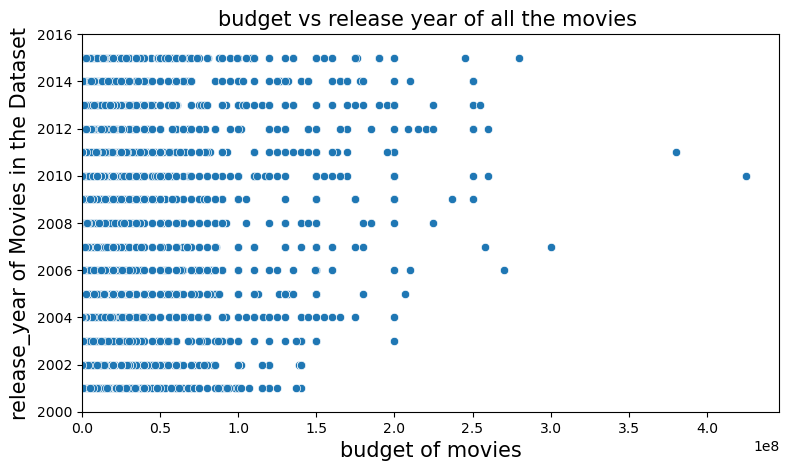

In [29]:
plt.figure(figsize=(9,5), dpi = 100)
#x-axis 
plt.xlabel('budget of movies', fontsize = 15)
#y-axis 
plt.ylabel('release_year of Movies in the Dataset', fontsize=15)
#Name of the graph
plt.title('budget vs release year of all the movies ', fontsize=15)
# using seaborn to plot
sns.scatterplot(data=recent_df, x="budget", y="release_year")
plt.xlim(0,)
plt.ylim(2000,2016)
#diplaying the plot
plt.show()

> **From the graph we noticed that there is no big change in budget through years.**

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


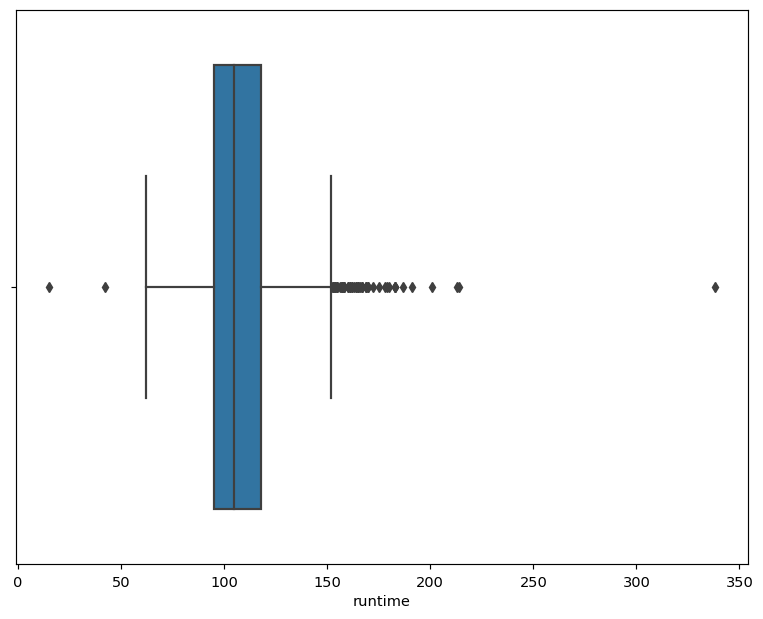

In [30]:
#box plot of the runtime of the movies 
plt.figure(figsize=(9,7), dpi = 105)

#seaborn to create the boxplot
sns.boxplot(recent_df['runtime'])
#diplaying the plot
plt.show()

> runtime is around 109min

<AxesSubplot:xlabel='budget', ylabel='revenue'>

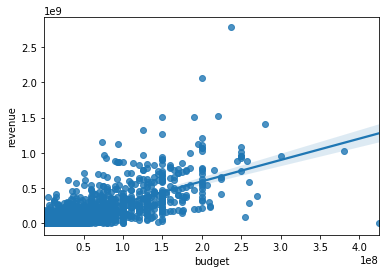

In [31]:
sns.regplot(x='budget',y='revenue',data=recent_df)

> **From the graph we noticed:**
>
> **a positive correlation between budget and revenue** 

<a id='conclusions'></a>
## Conclusions

> After the analysis, we can conclude following:
> Note we noticed that the curreny is not selected so i assumed it by dollar.
>
> 1.The highest Budget in movies (The warrior's way movie) is 425,000,000 dollar.
>
> 2.The highest revenue in movies (Avatar movie) is 2,781,505,847 dollar.
>
> 3.The most frequent genres : First: drama, Second: Comedy. 
>
> 4.The most frequent cast : First: Robert De Niro, Second: Brus willis. 
>
> 5.The most frequent director : First: Steven Spielbery, Second: Clint Eastwood. 
>
> 6.we see the the average budget is around 37,203,700 dollar. 
>
> 7.the average revenue is around 107,686,600 dollar.
>
> 8.the average runtime is around 109 minute.
>
> **From the conclustion, we noticed to make a film will be with a budget around 37,203,700 dollar, and with a runtime 109 min
with genres Drama, comedy, thriller.**
>
>**Limitation: This data collected and the analysis done according to the avalilable data I have it might be update on it, and the dropped missing data might affect the analysis but i have no other way because i don't have the source to complete missing from it.**
